In [54]:
library(dplyr)
library(ggplot2)

df.hbw <- read.csv(paste("C:/Users/kevin/Desktop/",
                     "USP_587_data/HW2/household_hbw.csv", sep=""))

In [55]:
df.resveh <- df.hbw %>%
    select(resty, hhveh, htrips) %>%
    filter(resty <7 ) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(resty, hhveh) %>%
    mutate(avg_trips = mean(htrips))

# Fit linear regression
fit.resveh.sum <- lm(htrips ~ factor(hhveh) * factor(resty),
                    data=df.resveh)

# Manual Error calcs
df.resveh$ResError <- (df.resveh$htrips - 
                           df.resveh$avg_trips)^2
df.resveh$TotError <- (df.resveh$htrips - 
                           mean(df.resveh$htrips))^2
SSE <- sum(df.resveh$ResError)
SST <- sum(df.resveh$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 16
n <- nrow(df.resveh)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))
adj.R2_v2 <- 1 - (1 - R2) * ((n - 1)/ (n - k - 1))
print(adj.R2)
print(adj.R2_v2)
summary(fit.resveh.sum)

[1] 0.07454329
[1] 0.07238101
[1] 0.07223686



Call:
lm(formula = htrips ~ factor(hhveh) * factor(resty), data = df.resveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.864  -5.142  -1.717   3.136  69.136 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     8.2222     0.7940  10.355  < 2e-16 ***
factor(hhveh)1                 -1.0801     0.8232  -1.312 0.189555    
factor(hhveh)2                  2.9985     0.8091   3.706 0.000212 ***
factor(hhveh)3                  3.6423     0.8175   4.455 8.53e-06 ***
factor(resty)2                  2.3547     1.6772   1.404 0.160383    
factor(resty)3                 -0.5053     0.9432  -0.536 0.592141    
factor(resty)4                 -4.0222     2.5110  -1.602 0.109237    
factor(hhveh)1:factor(resty)2  -2.6150     1.8374  -1.423 0.154720    
factor(hhveh)2:factor(resty)2  -2.4216     2.0717  -1.169 0.242498    
factor(hhveh)3:factor(resty)2   1.2424     2.6862   0.462 0.643748    
factor(hhveh)1:factor(resty)3   

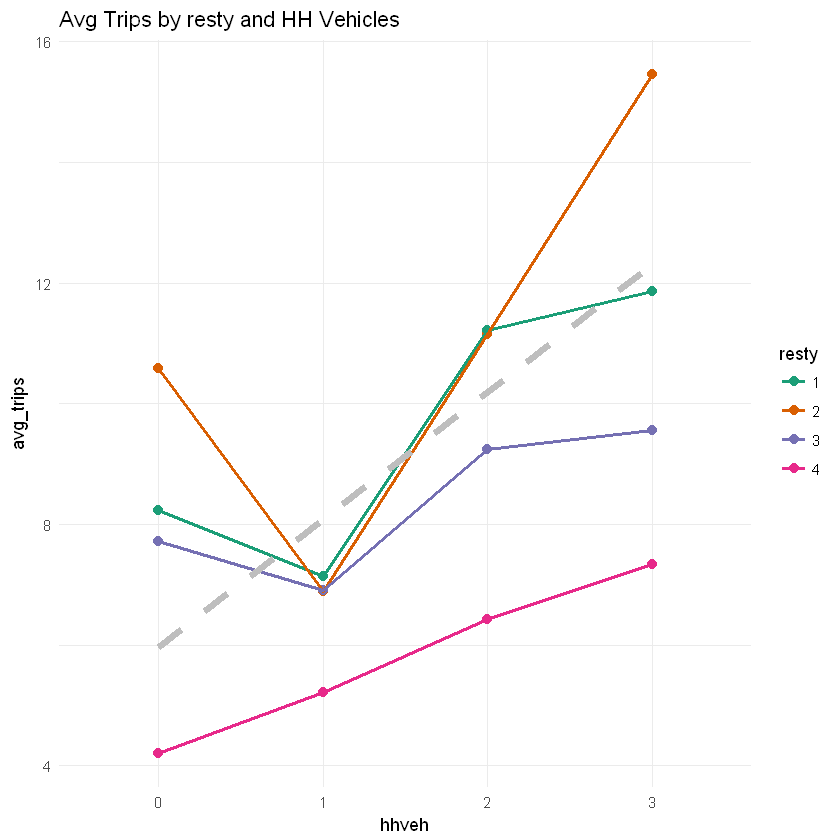

In [56]:
df.resveh$ hhveh <- as.factor(df.resveh$hhveh)
df.resveh$ resty <- as.factor(df.resveh$resty)

df.resveh %>%
    ggplot(aes(x=hhveh, y=avg_trips, color=resty, group=resty)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhveh, y=avg_trips, color=resty), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by resty and HH Vehicles") +
    scale_color_brewer(palette="Dark2")

In [57]:
data <- data.frame(resty = 4, hhveh=2)
predict(fit.resveh.sum, data, interval="predict")

,fit,lwr,upr
1,6.428571,-8.685994,21.54314


In [58]:
# Start with fresh data frame
# Recode categories
df.resveh.new <- df.hbw %>%
    select(resty, hhveh, htrips) %>%
    mutate(resty1=as.numeric(resty==1)) %>%
    mutate(resty2=as.numeric(resty==2)) %>%
    mutate(resty3=as.numeric(resty==3)) %>%
    mutate(resty4=as.numeric(resty==4)) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(resty1, resty2, resty3, resty4, hhveh) %>%
    mutate(avg_trips = mean(htrips))




In [59]:
ln.resveh.new <- lm(htrips ~ factor(hhveh) * factor(resty), data=df.resveh.new)
summary(ln.resveh.new)


Call:
lm(formula = htrips ~ factor(hhveh) * factor(resty), data = df.resveh.new)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.864  -5.142  -1.577   3.136  69.136 

Coefficients: (1 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     8.2222     0.7938  10.358  < 2e-16 ***
factor(hhveh)1                 -1.0801     0.8230  -1.312 0.189434    
factor(hhveh)2                  2.9985     0.8089   3.707 0.000211 ***
factor(hhveh)3                  3.6423     0.8173   4.456 8.48e-06 ***
factor(resty)2                  2.3547     1.6767   1.404 0.160269    
factor(resty)3                 -0.5053     0.9429  -0.536 0.592040    
factor(resty)4                 -4.0222     2.5103  -1.602 0.109140    
factor(resty)7                 -5.2222     7.5726  -0.690 0.490458    
factor(resty)9                 -8.2222     7.5726  -1.086 0.277615    
factor(hhveh)1:factor(resty)2  -2.6150     1.8369  -1.424 

##  AVG TRIPS by HHSize and HHVeh

In [60]:
# Start with fresh data frame
df.persveh <- df.hbw %>%
    select(hhsiz, hhveh, htrips) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5, 
                          `6`=5, `7`=5, `8`=5)) %>%
    
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(hhsiz, hhveh) %>%
    mutate(avg_trips = mean(htrips))

# Manual Error calcs
df.persveh$ResError <- (df.persveh$htrips - 
                           df.persveh$avg_trips)^2
df.persveh$TotError <- (df.persveh$htrips - 
                           mean(df.persveh$htrips))^2
SSE <- sum(df.persveh$ResError)
SST <- sum(df.persveh$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 20
n <- nrow(df.persveh)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))
adj.R2_v2 <- 1 - (1 - R2) * (n - 1) / (n - k - 1)
print(adj.R2)
print(adj.R2_v2)

[1] 0.4391722
[1] 0.4375145
[1] 0.4374272


In [61]:
fit <- lm(htrips ~ factor(hhsiz) * factor(hhveh), data=df.persveh, )
summary(fit)
fit$df
data <- data.frame(hhsiz=2, hhveh=2)
predict(fit, data, interval="predict")


Call:
lm(formula = htrips ~ factor(hhsiz) * factor(hhveh), data = df.persveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.816  -3.665  -0.463   2.929  58.184 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    6.46718    0.36439  17.748  < 2e-16 ***
factor(hhsiz)2                 3.28754    0.88410   3.718 0.000202 ***
factor(hhsiz)3                 7.53282    1.27592   5.904 3.73e-09 ***
factor(hhsiz)4                11.86615    1.98843   5.968 2.54e-09 ***
factor(hhsiz)5                17.19949    3.40528   5.051 4.52e-07 ***
factor(hhveh)1                -2.10609    0.40249  -5.233 1.72e-07 ***
factor(hhveh)2                -2.00388    0.53901  -3.718 0.000203 ***
factor(hhveh)3                -1.82432    0.78997  -2.309 0.020956 *  
factor(hhsiz)2:factor(hhveh)1  0.65699    0.93668   0.701 0.483081    
factor(hhsiz)3:factor(hhveh)1  0.81951    1.36634   0.600 0.548672    
factor(hhsiz)4:factor(hhveh)1  

[1] 6429

,fit,lwr,upr
1,7.828187,-3.672269,19.32864


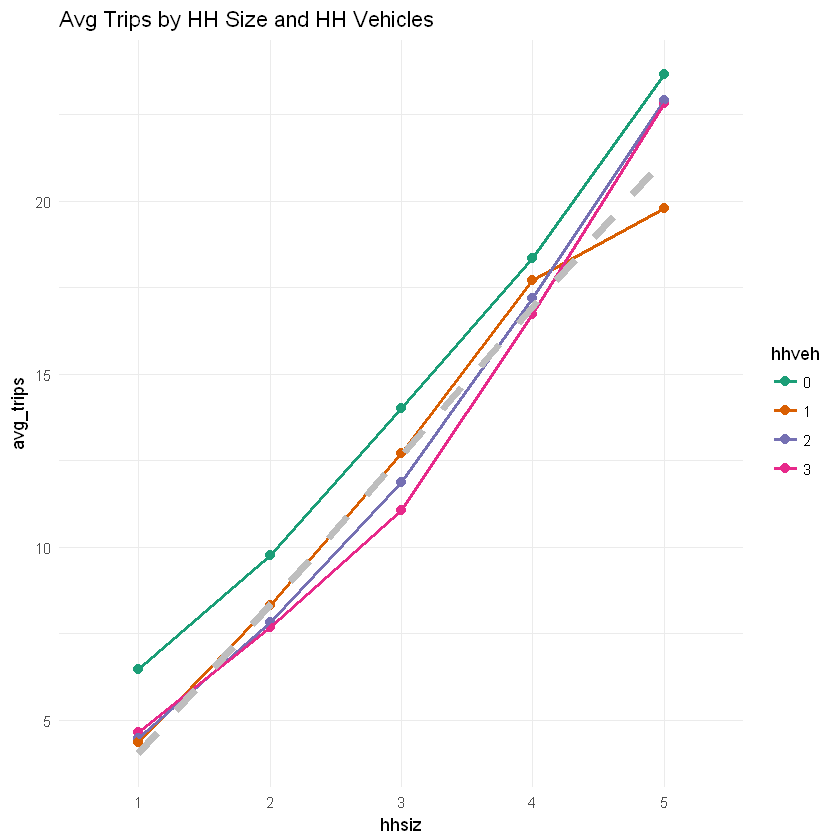

In [62]:
df.persveh$hhveh <- as.factor(df.persveh$hhveh)
df.persveh$hhsiz <- as.factor(df.persveh$hhsiz)

df.persveh%>%
    ggplot(aes(x=hhsiz, y=avg_trips, color=hhveh, group=hhveh)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhsiz, y=avg_trips, color=hhveh), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by HH Size and HH Vehicles") +
    scale_color_brewer(palette="Dark2")

In [63]:
persveh.fit <- lm(htrips ~ factor(hhsiz) + factor(hhveh), data=df.persveh)
print(persveh.fit)
summary(persveh.fit)


Call:
lm(formula = htrips ~ factor(hhsiz) + factor(hhveh), data = df.persveh)

Coefficients:
   (Intercept)  factor(hhsiz)2  factor(hhsiz)3  factor(hhsiz)4  factor(hhsiz)5  
         6.365           3.688           7.556          12.937          18.547  
factor(hhveh)1  factor(hhveh)2  factor(hhveh)3  
        -1.894          -2.133          -2.476  




Call:
lm(formula = htrips ~ factor(hhsiz) + factor(hhveh), data = df.persveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.018  -3.577  -0.471   2.973  58.563 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.3651     0.3192  19.938  < 2e-16 ***
factor(hhsiz)2   3.6876     0.2176  16.949  < 2e-16 ***
factor(hhsiz)3   7.5563     0.2663  28.371  < 2e-16 ***
factor(hhsiz)4  12.9368     0.2787  46.422  < 2e-16 ***
factor(hhsiz)5  18.5472     0.3552  52.218  < 2e-16 ***
factor(hhveh)1  -1.8940     0.3428  -5.525 3.42e-08 ***
factor(hhveh)2  -2.1325     0.3626  -5.881 4.28e-09 ***
factor(hhveh)3  -2.4758     0.3782  -6.546 6.37e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.866 on 6441 degrees of freedom
Multiple R-squared:  0.4377,	Adjusted R-squared:  0.4371 
F-statistic: 716.2 on 7 and 6441 DF,  p-value: < 2.2e-16


## Avg Trips by HH Size and Income

In [64]:
df.persinc <- df.hbw %>%
    select(hhsiz, income, htrips) %>%
    filter(income < 99) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=4, 
                          `6`=4, `7`=4, `8`=4)) %>%
    mutate(income = recode(income, `1`=1, `2`=1, `3`=2, `4`=2, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(hhsiz, income) %>%
    mutate(avg_trips = mean(htrips))

df.persinc$ResError <- (df.persinc$htrips - 
                           df.persinc$avg_trips)^2
df.persinc$TotError <- (df.persinc$htrips - 
                           mean(df.persinc$htrips))^2
SSE <- sum(df.persinc$ResError)
SST <- sum(df.persinc$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 11
n <- nrow(df.persinc)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)

persinc.fit <- lm(htrips ~ factor(hhsiz) * factor(income), 
                  data=df.persinc)
print(persinc.fit)
summary(persinc.fit)

[1] 0.4184151
[1] 0.417447

Call:
lm(formula = htrips ~ factor(hhsiz) * factor(income), data = df.persinc)

Coefficients:
                   (Intercept)                  factor(hhsiz)2  
                       4.73400                         2.69630  
                factor(hhsiz)3                  factor(hhsiz)4  
                       4.95718                        11.34176  
               factor(income)2                 factor(income)3  
                      -0.01916                        -0.07656  
factor(hhsiz)2:factor(income)2  factor(hhsiz)3:factor(income)2  
                      -0.42064                         1.01926  
factor(hhsiz)4:factor(income)2  factor(hhsiz)2:factor(income)3  
                       1.16897                         0.85861  
factor(hhsiz)3:factor(income)3  factor(hhsiz)4:factor(income)3  
                       2.59048                         3.09656  




Call:
lm(formula = htrips ~ factor(hhsiz) * factor(income), data = df.persinc)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.096  -3.226  -0.715   2.904  48.924 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     4.73400    0.26500  17.864  < 2e-16 ***
factor(hhsiz)2                  2.69630    0.53200   5.068 4.13e-07 ***
factor(hhsiz)3                  4.95718    0.76588   6.473 1.04e-10 ***
factor(hhsiz)4                 11.34176    0.77603  14.615  < 2e-16 ***
factor(income)2                -0.01916    0.37132  -0.052 0.958841    
factor(income)3                -0.07656    0.36190  -0.212 0.832463    
factor(hhsiz)2:factor(income)2 -0.42064    0.65884  -0.638 0.523203    
factor(hhsiz)3:factor(income)2  1.01926    0.94333   1.080 0.279966    
factor(hhsiz)4:factor(income)2  1.16897    0.96637   1.210 0.226460    
factor(hhsiz)2:factor(income)3  0.85861    0.60367   1.422 0.154988    
factor(hhsiz)3:fact

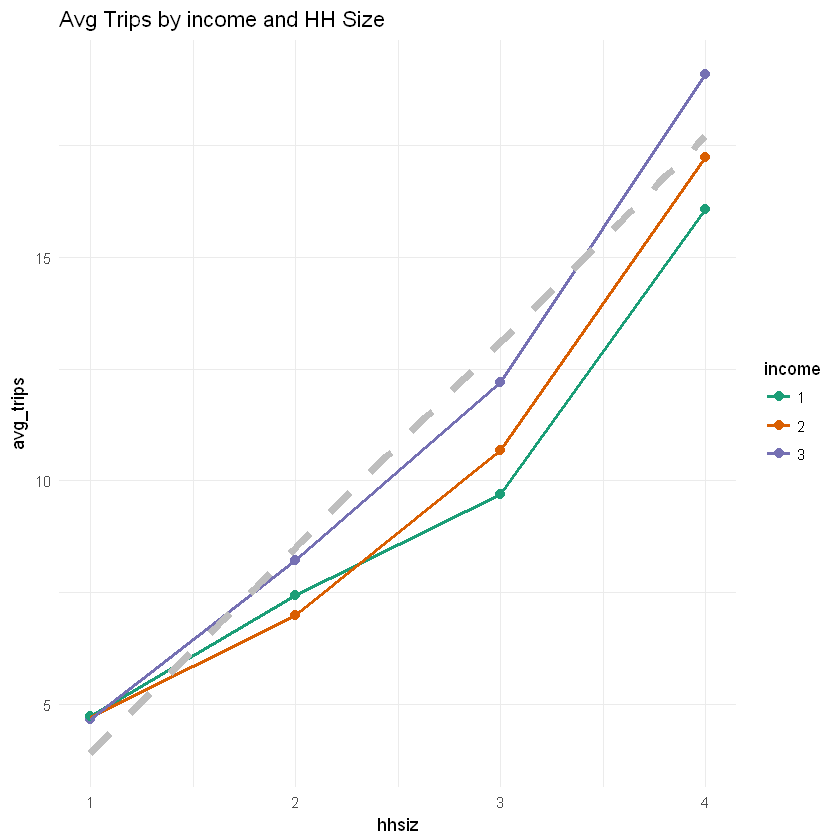

In [65]:
# Graph Avg Trips by income and HH Size
df.persinc$income <- as.factor(df.persinc$income)

df.persinc %>%
    ggplot(aes(x=hhsiz, y=avg_trips, color=income, group=income)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhsiz, y=avg_trips, color=income), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by income and HH Size") +
    scale_color_brewer(palette="Dark2")

In [66]:
# HH Size Income 
df.persinc <- df.hbw %>%
    select(hhsiz, income, htrips) %>%
    filter(income < 99) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=4, 
                          `6`=4, `7`=4, `8`=4)) %>%
    group_by(hhsiz, income) %>%
    mutate(avg_trips = mean(htrips))

df.persinc$ResError <- (df.persinc$htrips - 
                           df.persinc$avg_trips)^2
df.persinc$TotError <- (df.persinc$htrips - 
                           mean(df.persinc$htrips))^2
SSE <- sum(df.persinc$ResError)
SST <- sum(df.persinc$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 11
n <- nrow(df.persinc)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)

persinc.fit <- lm(htrips ~ factor(hhsiz) + factor(income), 
                  data=df.persinc)
print(persinc.fit)
summary(persinc.fit)

[1] 0.420007
[1] 0.4190414

Call:
lm(formula = htrips ~ factor(hhsiz) + factor(income), data = df.persinc)

Coefficients:
    (Intercept)   factor(hhsiz)2   factor(hhsiz)3   factor(hhsiz)4  
        4.55774          2.77485          6.57532         13.42852  
factor(income)2  factor(income)3  factor(income)4  factor(income)5  
       -0.24720         -0.46169         -0.01122          0.50752  
factor(income)6  factor(income)7  factor(income)8  
        0.88626          1.06040          1.29325  




Call:
lm(formula = htrips ~ factor(hhsiz) + factor(income), data = df.persinc)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.047  -3.622  -0.618   2.909  47.261 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.55774    0.33979  13.414  < 2e-16 ***
factor(hhsiz)2   2.77485    0.20900  13.277  < 2e-16 ***
factor(hhsiz)3   6.57532    0.25913  25.374  < 2e-16 ***
factor(hhsiz)4  13.42852    0.24640  54.500  < 2e-16 ***
factor(income)2 -0.24720    0.43044  -0.574  0.56579    
factor(income)3 -0.46169    0.43270  -1.067  0.28602    
factor(income)4 -0.01122    0.40416  -0.028  0.97784    
factor(income)5  0.50752    0.38246   1.327  0.18457    
factor(income)6  0.88626    0.39395   2.250  0.02451 *  
factor(income)7  1.06040    0.40290   2.632  0.00851 ** 
factor(income)8  1.29325    0.44100   2.933  0.00337 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.933 on 6008 degrees of freedom
M

## Trips by Income and HHVeh

In [67]:
df.vehinc <- df.hbw %>%
    select(hhveh, income, htrips) %>%
    filter(income < 99) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    mutate(income = recode(income, `1`=1, `2`=1, `3`=2, `4`=2, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(hhveh, income) %>%
    mutate(avg_trips = mean(htrips))

df.vehinc$ResError <- (df.persinc$htrips - 
                           df.vehinc$avg_trips)^2
df.vehinc$TotError <- (df.vehinc$htrips - 
                           mean(df.vehinc$htrips))^2
SSE <- sum(df.vehinc$ResError)
SST <- sum(df.vehinc$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 12
n <- nrow(df.vehinc)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)

vehinc.fit <- lm(htrips ~ factor(hhveh) * factor(income), 
                  data=df.vehinc)
print(vehinc.fit)
summary(vehinc.fit)

[1] 0.09106187
[1] 0.08939714

Call:
lm(formula = htrips ~ factor(hhveh) * factor(income), data = df.vehinc)

Coefficients:
                   (Intercept)                  factor(hhveh)1  
                        6.9242                         -1.1332  
                factor(hhveh)2                  factor(hhveh)3  
                        1.7283                          2.1284  
               factor(income)2                 factor(income)3  
                        1.4848                          4.5043  
factor(hhveh)1:factor(income)2  factor(hhveh)2:factor(income)2  
                       -1.0785                         -1.5186  
factor(hhveh)3:factor(income)2  factor(hhveh)1:factor(income)3  
                       -0.5571                         -2.0080  
factor(hhveh)2:factor(income)3  factor(hhveh)3:factor(income)3  
                       -1.3633                         -1.5585  




Call:
lm(formula = htrips ~ factor(hhveh) * factor(income), data = df.vehinc)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.998  -4.998  -1.794   3.347  56.347 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      6.9242     0.5264  13.153  < 2e-16 ***
factor(hhveh)1                  -1.1332     0.6328  -1.791  0.07338 .  
factor(hhveh)2                   1.7283     0.8615   2.006  0.04489 *  
factor(hhveh)3                   2.1284     1.3120   1.622  0.10479    
factor(income)2                  1.4848     0.9491   1.565  0.11774    
factor(income)3                  4.5043     1.1820   3.811  0.00014 ***
factor(hhveh)1:factor(income)2  -1.0785     1.0563  -1.021  0.30728    
factor(hhveh)2:factor(income)2  -1.5186     1.2284  -1.236  0.21643    
factor(hhveh)3:factor(income)2  -0.5571     1.6442  -0.339  0.73476    
factor(hhveh)1:factor(income)3  -2.0080     1.2609  -1.593  0.11132    
factor(hhveh)2:facto

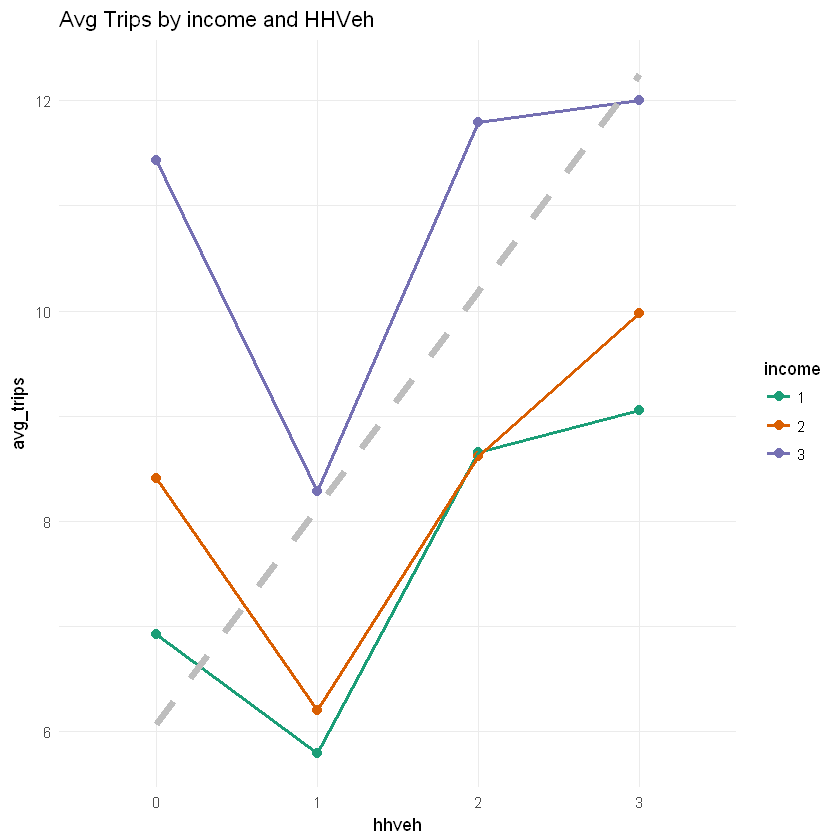

In [68]:
# Graph Avg Trips by HHVeh and income
df.vehinc$income <- as.factor(df.vehinc$income)
df.vehinc$hhveh <- as.factor(df.vehinc$hhveh)

df.vehinc %>%
    ggplot(aes(x=hhveh, y=avg_trips, color=income, group=income)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhveh, y=avg_trips, color=income), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by income and HHVeh") +
    scale_color_brewer(palette="Dark2")

In [69]:
# HH Size only
df.pers <- df.hbw %>%
    select(hhsiz, htrips) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5, 
                          `6`=5, `7`=5, `8`=5)) %>%
    group_by(hhsiz) %>%
    mutate(avg_trips = mean(htrips))

df.pers$ResError <- (df.pers$htrips - df.pers$avg_trips)^2
df.pers$TotError <- (df.pers$htrips - mean(df.pers$htrips))^2
SSE <- sum(df.pers$ResError)
SST <- sum(df.pers$TotError)
R2 <- 1 - (SSE/SST)
print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
k <- 5
n <- nrow(df.pers)
print(paste("n =", n, sep=" "))
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))

pers.fit <- lm(htrips ~ factor(hhsiz), data=df.pers)
summary(pers.fit)

[1] "SSE = 223155.764668476"
[1] "SST = 394221.676849124"
[1] "R2 = 0.433933297498803"
[1] "n = 6449"



Call:
lm(formula = htrips ~ factor(hhsiz), data = df.pers)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.661  -3.745  -0.702   3.072  58.339 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.7019     0.1417   33.17   <2e-16 ***
factor(hhsiz)2   3.2256     0.1847   17.46   <2e-16 ***
factor(hhsiz)3   7.0430     0.2357   29.88   <2e-16 ***
factor(hhsiz)4  12.4035     0.2444   50.74   <2e-16 ***
factor(hhsiz)5  17.9591     0.3243   55.38   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.885 on 6444 degrees of freedom
Multiple R-squared:  0.4339,	Adjusted R-squared:  0.4336 
F-statistic:  1235 on 4 and 6444 DF,  p-value: < 2.2e-16


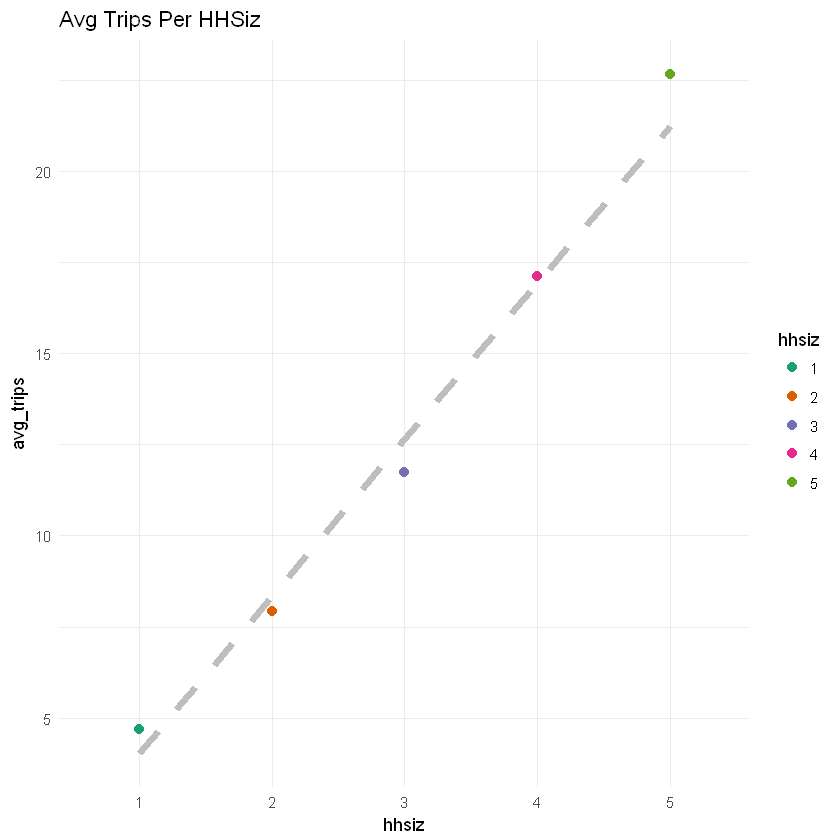

In [70]:
# Graph Avg Trips by HHSiz
df.pers$hhsiz <- as.factor(df.pers$hhsiz)

df.pers %>%
    ggplot(aes(x=hhsiz, y=avg_trips, color=hhsiz)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips Per HHSiz") +
    scale_color_brewer(palette="Dark2")

## HHSiz and Presence of Workers

In [71]:
df.perswrk <- df.hbw %>%
    select(hhwrk, hhsiz, htrips) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5, 
                          `6`=5, `7`=4, `8`=5)) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0,`1`=1, `2`=1, `3`=1, `4`=1, `5`=1)) %>%
    group_by(hhsiz, hhwrk) %>%
    mutate(avg_trips = mean(htrips))

# Manual R2 Calculations
df.perswrk$ResError <- (df.perswrk$htrips - df.perswrk$avg_trips)^2
df.perswrk$TotError <- (df.perswrk$htrips - mean(df.perswrk$htrips))^2
SSE <- sum(df.perswrk$ResError)
SST <- sum(df.perswrk$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 12
n <- nrow(df.perswrk)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)

perswrk.fit <- lm(htrips ~ factor(hhsiz) * factor(hhwrk), data=df.perswrk)
print(perswrk.fit)
summary(perswrk.fit)

[1] 0.4332779
[1] 0.4323093

Call:
lm(formula = htrips ~ factor(hhsiz) * factor(hhwrk), data = df.perswrk)

Coefficients:
                  (Intercept)                 factor(hhsiz)2  
                       3.8561                         2.6356  
               factor(hhsiz)3                 factor(hhsiz)4  
                       4.4992                         7.2868  
               factor(hhsiz)5                 factor(hhwrk)1  
                      14.4166                         1.2336  
factor(hhsiz)2:factor(hhwrk)1  factor(hhsiz)3:factor(hhwrk)1  
                       0.4489                         2.4423  
factor(hhsiz)4:factor(hhwrk)1  factor(hhsiz)5:factor(hhwrk)1  
                       5.5191                         2.4766  




Call:
lm(formula = htrips ~ factor(hhsiz) * factor(hhwrk), data = df.perswrk)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.983  -3.492  -0.856   2.910  63.104 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     3.8561     0.2530  15.241  < 2e-16 ***
factor(hhsiz)2                  2.6356     0.3998   6.592 4.69e-11 ***
factor(hhsiz)3                  4.4992     0.7215   6.236 4.78e-10 ***
factor(hhsiz)4                  7.2868     1.1416   6.383 1.86e-10 ***
factor(hhsiz)5                 14.4166     1.7940   8.036 1.09e-15 ***
factor(hhwrk)1                  1.2336     0.3056   4.037 5.48e-05 ***
factor(hhsiz)2:factor(hhwrk)1   0.4489     0.4535   0.990  0.32233    
factor(hhsiz)3:factor(hhwrk)1   2.4423     0.7671   3.184  0.00146 ** 
factor(hhsiz)4:factor(hhwrk)1   5.5191     1.1711   4.713 2.50e-06 ***
factor(hhsiz)5:factor(hhwrk)1   2.4766     1.8293   1.354  0.17584    
---
Signif. codes:  0 '***' 0.0

In [76]:
# Start with fresh data frame
df.perslic <- df.hbw %>%
    select(hhsiz, hhlic, htrips) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5, 
                          `6`=5, `7`=5, `8`=5)) %>%
    
    mutate(hhlic = recode(hhlic, `0`=0, `1`=1, `2`=1, `3`=1, `4`=1, `5`=1, 
                          `6`=1, `7`=1)) %>%
    group_by(hhsiz, hhlic) %>%
    mutate(avg_trips = mean(htrips))

# Manual Error calcs
df.perslic$ResError <- (df.perslic$htrips - 
                           df.perslic$avg_trips)^2
df.perslic$TotError <- (df.perslic$htrips - 
                           mean(df.perslic$htrips))^2
SSE <- sum(df.perslic$ResError)
SST <- sum(df.perslic$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 10
n <- nrow(df.perslic)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))
adj.R2_v2 <- 1 - (1 - R2) * (n - 1) / (n - k - 1)
print(adj.R2)
print(adj.R2_v2)

perslic.fit <- lm(htrips ~ factor(hhsiz) * factor(hhlic), data=df.perslic)
print(perslic.fit)
summary(perslic.fit)


[1] 0.4359072
[1] 0.4351186
[1] 0.435031

Call:
lm(formula = htrips ~ factor(hhsiz) * factor(hhlic), data = df.perslic)

Coefficients:
                  (Intercept)                 factor(hhsiz)2  
                       5.8400                        -0.3067  
               factor(hhsiz)3                 factor(hhsiz)4  
                      11.2711                         7.3267  
               factor(hhsiz)5                 factor(hhlic)1  
                      24.6600                        -1.2466  
factor(hhsiz)2:factor(hhlic)1  factor(hhsiz)3:factor(hhlic)1  
                       3.6554                        -4.1696  
factor(hhsiz)4:factor(hhlic)1  factor(hhsiz)5:factor(hhlic)1  
                       5.2126                        -6.6312  




Call:
lm(formula = htrips ~ factor(hhsiz) * factor(hhlic), data = df.perslic)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.622  -3.695  -0.593   3.058  58.378 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     5.8400     0.4798  12.171  < 2e-16 ***
factor(hhsiz)2                 -0.3067     1.5914  -0.193  0.84720    
factor(hhsiz)3                 11.2711     2.0168   5.589 2.38e-08 ***
factor(hhsiz)4                  7.3267     2.4467   2.995  0.00276 ** 
factor(hhsiz)5                 24.6600     4.1831   5.895 3.93e-09 ***
factor(hhlic)1                 -1.2466     0.5022  -2.482  0.01308 *  
factor(hhsiz)2:factor(hhlic)1   3.6554     1.6027   2.281  0.02259 *  
factor(hhsiz)3:factor(hhlic)1  -4.1696     2.0311  -2.053  0.04012 *  
factor(hhsiz)4:factor(hhlic)1   5.2126     2.4593   2.120  0.03408 *  
factor(hhsiz)5:factor(hhlic)1  -6.6312     4.1959  -1.580  0.11407    
---
Signif. codes:  0 '***' 0.0

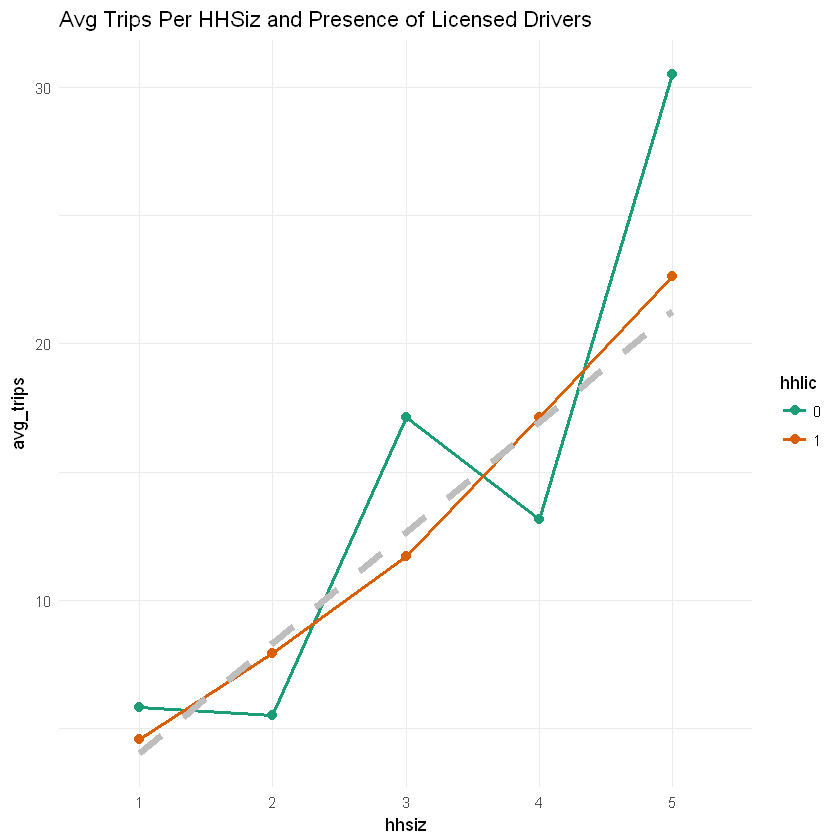

In [73]:
# Graph Avg Trips by HHSiz and Presence of Licensed Drivers
df.perslic$hhsiz <- as.factor(df.perslic$hhsiz)
df.perslic$hhlic <- as.factor(df.perslic$hhlic)

df.perslic %>%
    ggplot(aes(x=hhsiz, y=avg_trips, color=hhlic, group=hhlic)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhsiz, y=avg_trips, color=hhlic), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips Per HHSiz and Presence of Licensed Drivers") +
    scale_color_brewer(palette="Dark2")

## HHSiz and Presence of Workers

In [115]:
df.wrk <- df.hbw %>%
    select(hhwrk, hhsiz, htrips) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5, 
                          `6`=5, `7`=5, `8`=5)) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=1, `3`=1, `4`=1, `5`=1)) %>%
    group_by(hhsiz, hhwrk) %>%
    mutate(avg_trips = mean(htrips))

# Manual R2 Calculations
df.wrk$ResError <- (df.wrk$htrips - df.wrk$avg_trips)^2
df.wrk$TotError <- (df.wrk$htrips - mean(df.wrk$htrips))^2
SSE <- sum(df.wrk$ResError)
SST <- sum(df.wrk$TotError)
R2 <- 1 - (SSE/SST)
k <- 10
n <- nrow(df.wrk)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("adj R2 =", adj.R2, sep=" "))


wrk.fit <- lm(htrips ~ factor(hhsiz) * factor(hhwrk), data=df.wrk)
print(wrk.fit)
summary(wrk.fit)

[1] "SSE = 219410.128353974"
[1] "SST = 394221.676849124"
[1] "R2 = 0.443434642895231"
[1] "adj R2 = 0.442656592535811"

Call:
lm(formula = htrips ~ factor(hhsiz) * factor(hhwrk), data = df.wrk)

Coefficients:
                  (Intercept)                 factor(hhsiz)2  
                       3.8561                         2.6356  
               factor(hhsiz)3                 factor(hhsiz)4  
                       4.4992                         7.2208  
               factor(hhsiz)5                 factor(hhwrk)1  
                      13.4516                         1.2336  
factor(hhsiz)2:factor(hhwrk)1  factor(hhsiz)3:factor(hhwrk)1  
                       0.4489                         2.4423  
factor(hhsiz)4:factor(hhwrk)1  factor(hhsiz)5:factor(hhwrk)1  
                       4.9799                         4.2963  




Call:
lm(formula = htrips ~ factor(hhsiz) * factor(hhwrk), data = df.wrk)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.838  -3.290  -0.856   2.910  58.162 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     3.8561     0.2507  15.379  < 2e-16 ***
factor(hhsiz)2                  2.6356     0.3962   6.652 3.14e-11 ***
factor(hhsiz)3                  4.4992     0.7150   6.293 3.33e-10 ***
factor(hhsiz)4                  7.2208     1.1719   6.161 7.65e-10 ***
factor(hhsiz)5                 13.4516     1.6383   8.211 2.63e-16 ***
factor(hhwrk)1                  1.2336     0.3028   4.074 4.68e-05 ***
factor(hhsiz)2:factor(hhwrk)1   0.4489     0.4494   0.999  0.31796    
factor(hhsiz)3:factor(hhwrk)1   2.4423     0.7602   3.213  0.00132 ** 
factor(hhsiz)4:factor(hhwrk)1   4.9799     1.2010   4.146 3.42e-05 ***
factor(hhsiz)5:factor(hhwrk)1   4.2963     1.6731   2.568  0.01026 *  
---
Signif. codes:  0 '***' 0.001 '

## HHSiz and Presence of Licensed Drivers

In [75]:
((223155.8 - 217483.3)/5) / (217483.3/(6449-10-1))

[1] 33.58378